In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from scipy.signal import convolve2d

#Configure matplotlib
%matplotlib inline
# Use jshtml to render aniimation
plt.rcParams['animation.html'] = 'jshtml'

In [2]:
def update_matrix(M: np.ndarray):
    """
    Given a binary matrix M, slide a 3x3 window over it,
    compute the sum of the eight neighbors (excluding the center),
    and flip the center cell if that sum is odd.
    """
    # 3x3 kernel that sums up all cells except the center.
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])
    # Use convolution. Here, we assume that out-of-bound cells are 0.
    neighbors_sum = convolve2d(M, kernel, mode='same', boundary='fill', fillvalue=0)
    # Create new matrix: if the sum of neighbors is odd, flip the cell; otherwise keep it.
    new_M = np.where(neighbors_sum % 2 == 1, 1 - M, M)
    return new_M

def generate_states(M: np.ndarray):
    """
    Generate all states until the matrix either stabilizes (converges) or
    returns to the initial configuration (cycles).
    """
    states = [M.copy()]
    initial_M = M.copy()
    
    while True:
        new_M = update_matrix(M)
        states.append(new_M.copy())
        # Check if the matrix has converged or cycled back to the initial configuration.
        if np.array_equal(new_M, M):
            return states, True
        elif np.array_equal(new_M, initial_M):
            return states, False
        M = new_M.copy()


Enter the size N of the NxN matrix:  5


Matrix converged at step 6.


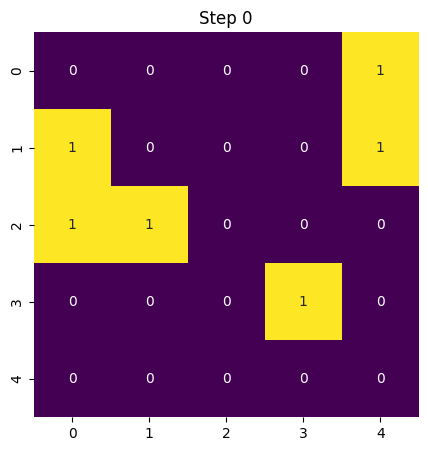

In [ ]:

N = int(input("Enter the size N of the NxN matrix: "))
    
# Create an initial random binary matrix.
M = np.random.randint(0, 2, (N, N))
states, is_converged = generate_states(M)

if is_converged:
    print(f"Matrix converged at step {len(states)}.")
else:
    print(f"Matrix cycled back to initial state at step {len(states)}.")

# Set up the figure and axis for animation.
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the initial state.
sns.heatmap(states[0], cbar=False, cmap='viridis', square=True, annot=True, fmt='d', ax=ax)
ax.set_title("Step 0")

def update(frame):
    ax.clear()  # Clear the previous heatmap.
    sns.heatmap(states[frame], cbar=False, cmap='viridis', square=True, annot=True, fmt='d', ax=ax)
    if frame < len(states) - 1:
        ax.set_title(f"Step {frame}")
    else:
        if is_converged:
            ax.set_title(f"Step {frame}: Converged!")
        else:
            ax.set_title(f"Step {frame}: Cycled back to intial state!")
    return ax

# Create the animation: each frame is displayed for 500 milliseconds.
anim = FuncAnimation(fig, update, frames=len(states), interval=500, repeat=False)
anim